# STATISTICAL TEST

## Packages

In [2]:
# Import the stats module from scipy, pandas, matplotlib, numpy, and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [8]:
%config InlineBackend.figure_format = 'retina'

## Import data

In [3]:
# Import the dataset ICU_Mortality.csv and assign it to the varible `df`
df = pd.read_csv('ICU_Mortality.csv')

In [4]:
# Show the first five ros of data
df.head()

,Mortality,Age,WCC,HB,Diabetes,Class
0,Died,69,12.0,11.7,NaN,Non-infectious
1,Died,73,9.0,13.2,NaN,Non-infectious
2,Died,53,16.4,11.1,NaN,Non-infectious
3,Died,74,10.1,11.2,Type II,Infectious
4,Died,69,10.2,15.0,Type I,Infectious


In [5]:
# Show info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Mortality  311 non-null    object 
 1   Age        311 non-null    int64  
 2   WCC        311 non-null    float64
 3   HB         311 non-null    float64
 4   Diabetes   213 non-null    object 
 5   Class      311 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 14.7+ KB


## EDA

## Mortality

In [6]:
# Calculate the frequency of the categories in the `Mortality` column
df['Mortality'].value_counts()

Mortality
Survived    207
Died        104
Name: count, dtype: int64

In [7]:
# Calculate the realtive frequency of the categories in the `Mortality` column
df['Mortality'].value_counts(normalize=True)

Mortality
Survived    0.665595
Died        0.334405
Name: proportion, dtype: float64

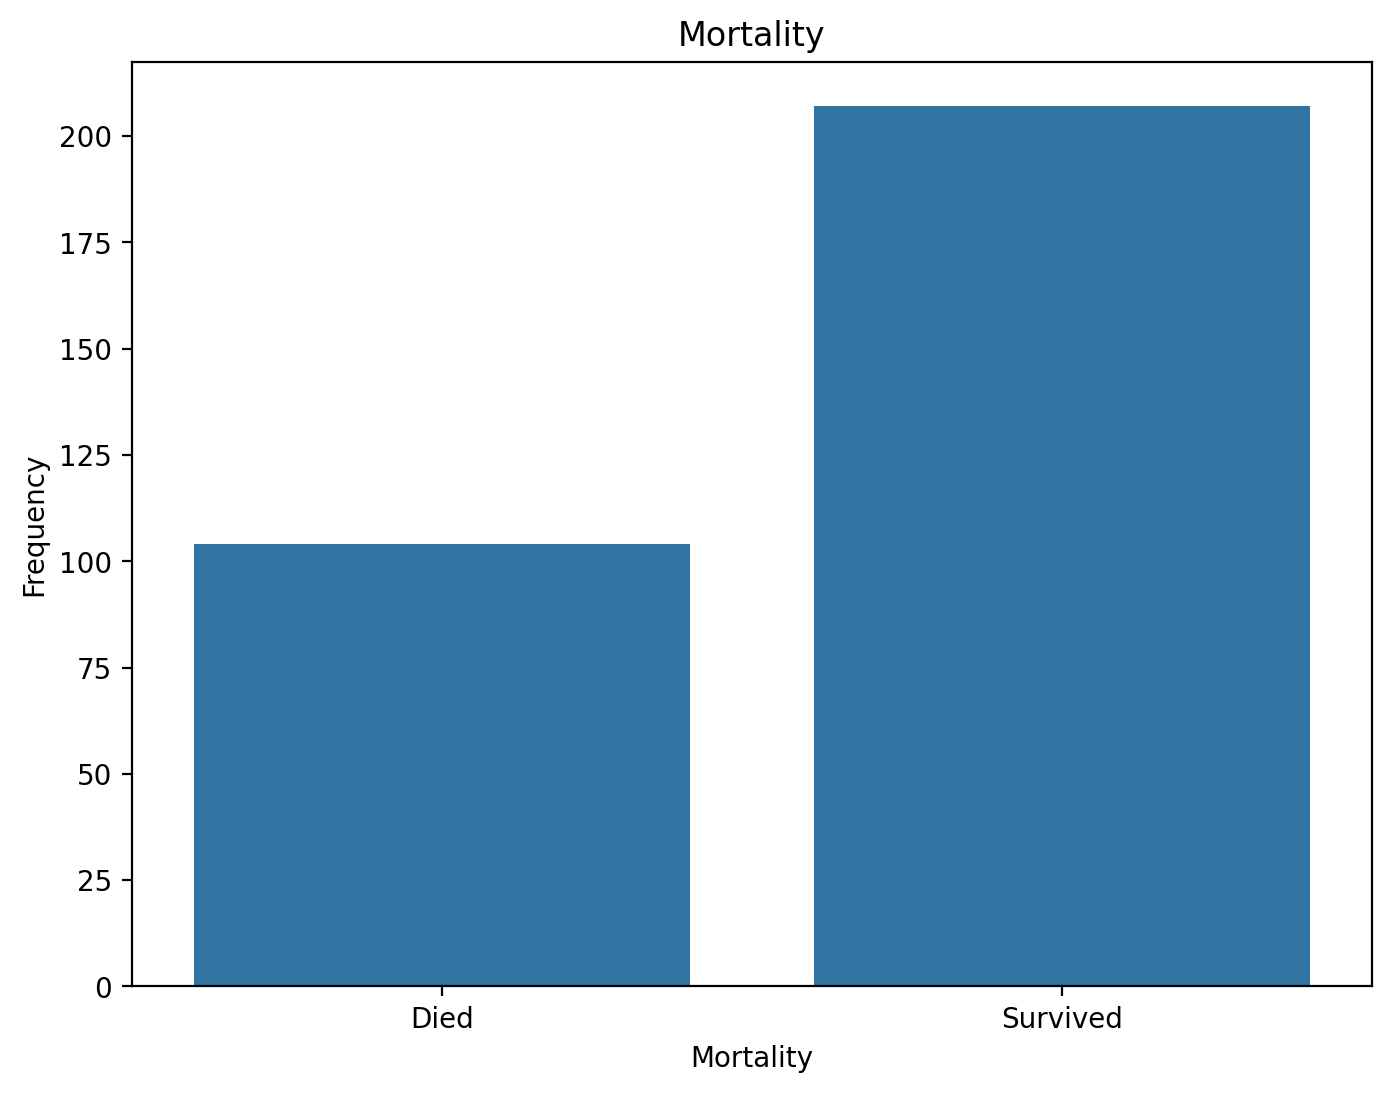

In [10]:
# Generate a bar chart of the frequency of the categories in the `Mortality` column
# Add the title "Mortality"
# Add the horizontal label "Mortality"
# Add the vertical label "Frequency"
plt.figure(figsize=(8, 6))
sns.countplot(x='Mortality', data=df)
plt.title('Mortality')
plt.xlabel('Mortality')
plt.ylabel('Frequency')
plt.show();

### Age

In [11]:
# Calculate summary statistics for the `Age` column for each category in the `Mortality` column
df.groupby('Mortality')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Mortality,,,,,,,,
Died,104.0,61.125000,9.738012,45.0,52.75,61.0,69.0,77.0
Survived,207.0,54.111111,10.830209,23.0,47.00,53.0,60.0,85.0


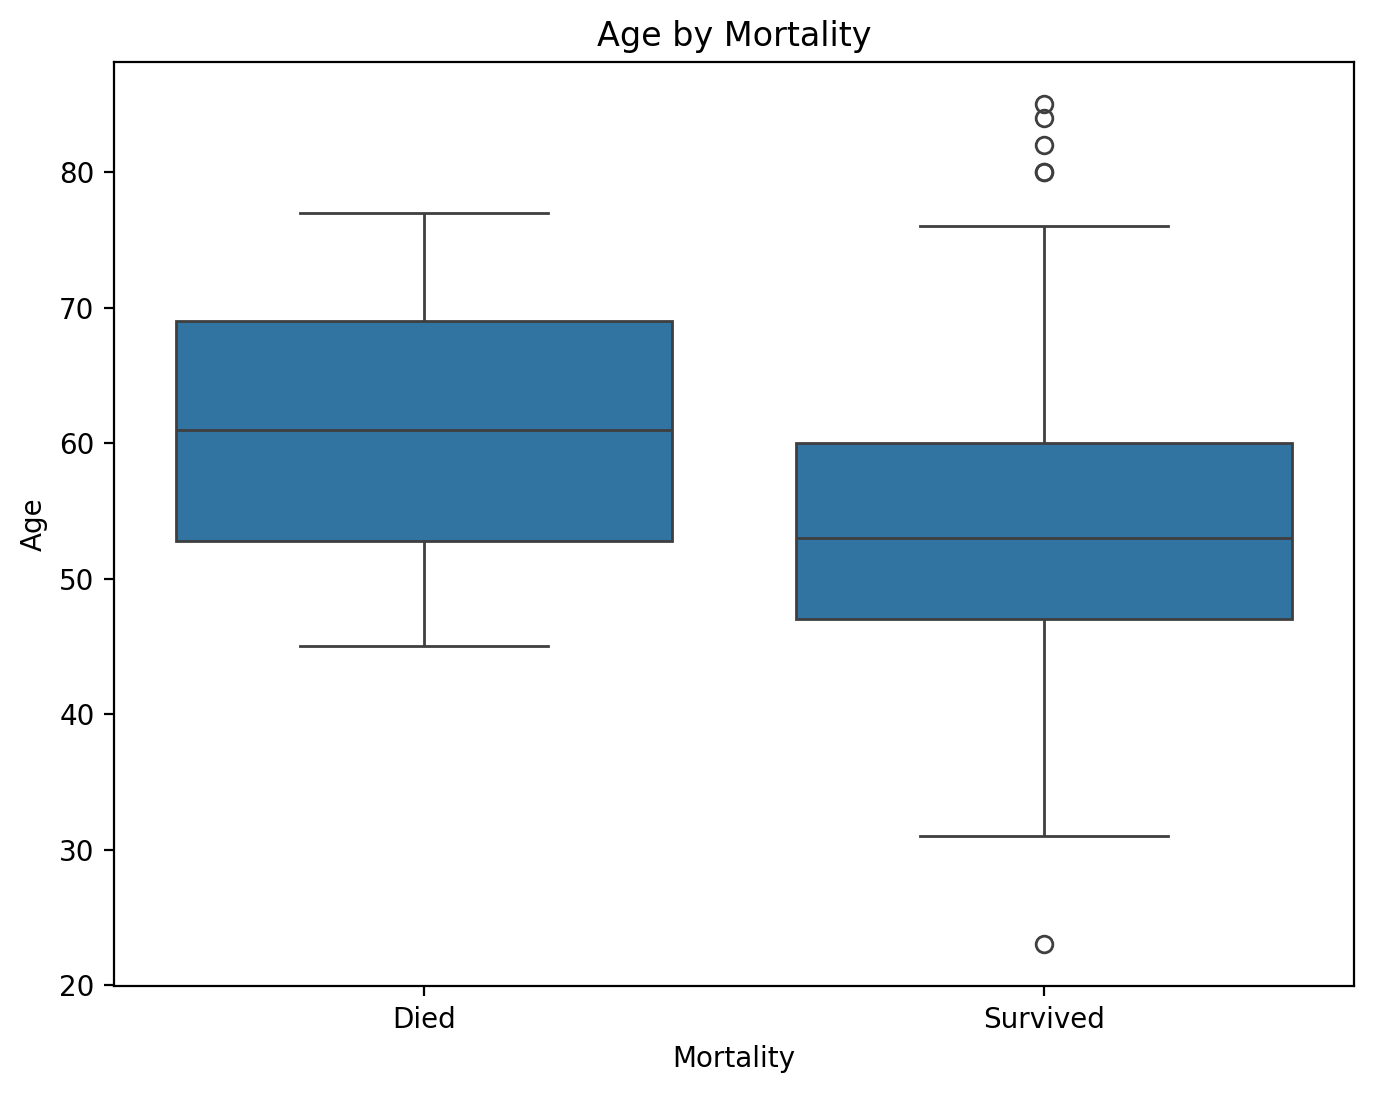

In [12]:
# Create a box-and-=whisker plot of the `Age` column for each category in the `Mortality` column
# Add the title "Age by Mortality"
# Add the horizontal label "Mortality"
# Add the vertical label "Age"
plt.figure(figsize=(8, 6))
sns.boxplot(x='Mortality', y='Age', data=df)
plt.title('Age by Mortality')
plt.xlabel('Mortality')
plt.ylabel('Age')
plt.show();

## Statistical tests

### Age comparison between survivors and non-survivors

In [ ]:
# Create a numpy array of the `Age` column only for the `Mortality` category "Died"
# Assign this to the variable `age_died`
age_died = df[df['Mortality'] == 'Died']['Age'].to_numpy()

# Create a numpy array of the `Age` column only for the `Mortality` category "Survived"
# Assign this to the variable `age_survived`
age_survived = df[df['Mortality'] == 'Survived']['Age'].to_numpy()

In [14]:
# Calculate the ratio of variances between `age_died` and `age_survived`
age_died.var() / age_survived.var()

np.float64(0.8045888311255794)

In [15]:
# Conduct Levene's test for equal variances
stats.levene(age_died, age_survived)

LeveneResult(statistic=np.float64(7.0145796435275225e-06), pvalue=np.float64(0.9978885101059543))

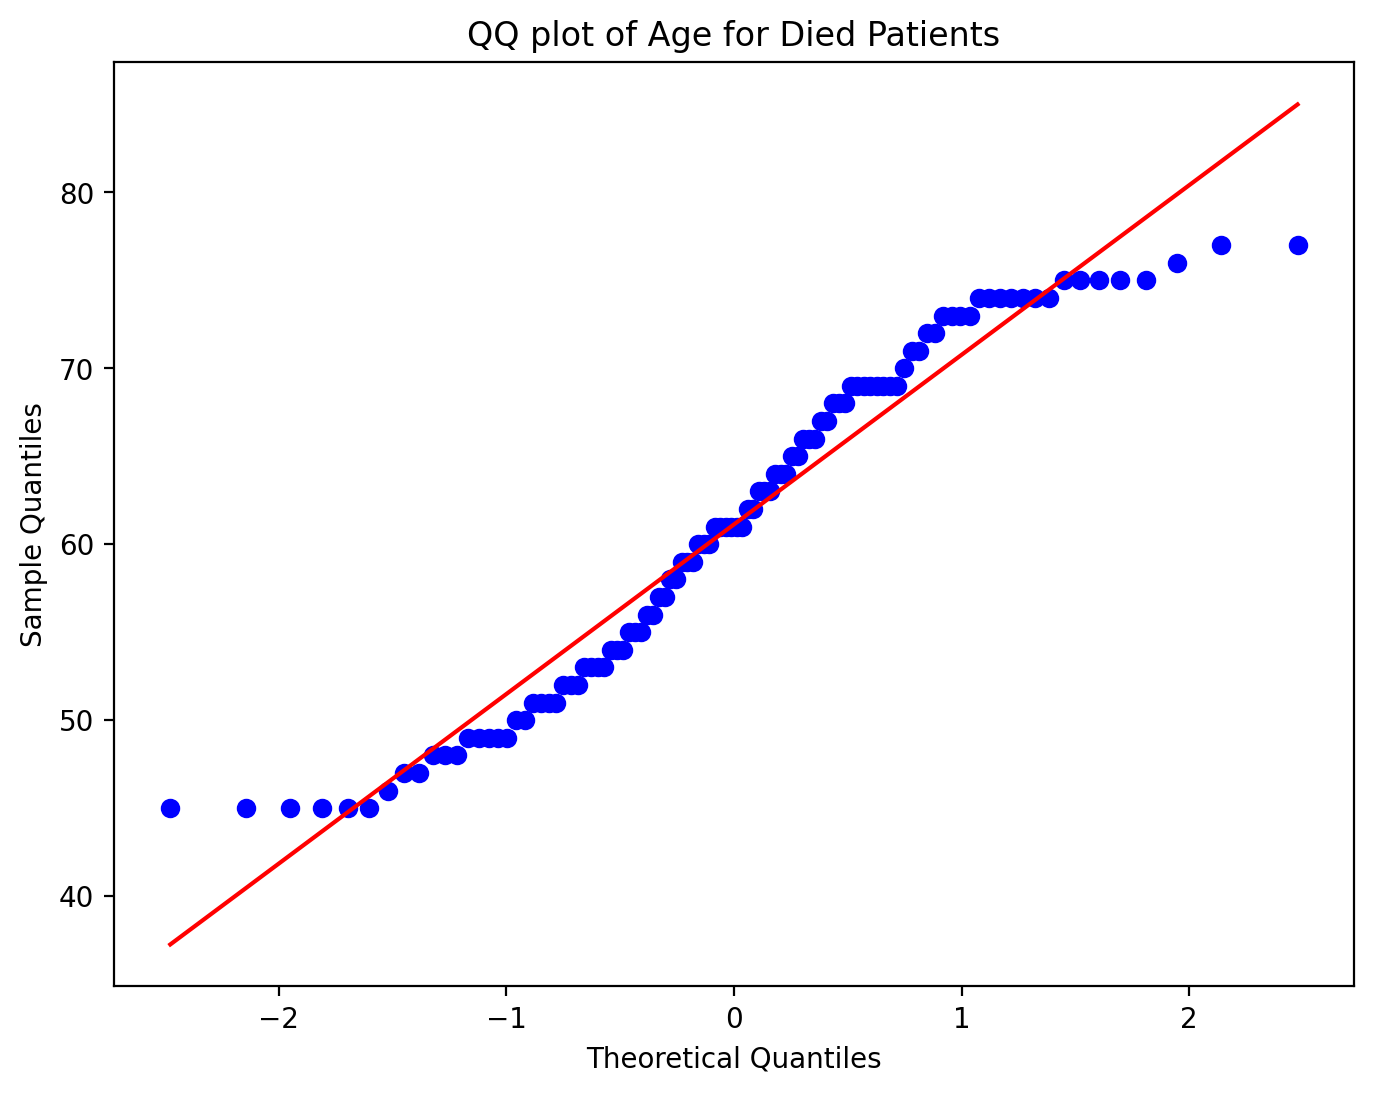

In [16]:
# Create a QQ plot of the `age_died` data
# Add the title "QQ plot of Age for Died Patients"
# Add the horizontal label "Theoretical Quantiles"
# Add the vertical label "Sample Quantiles"
plt.figure(figsize=(8, 6))
stats.probplot(age_died, dist="norm", plot=plt)
plt.title('QQ plot of Age for Died Patients')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show();

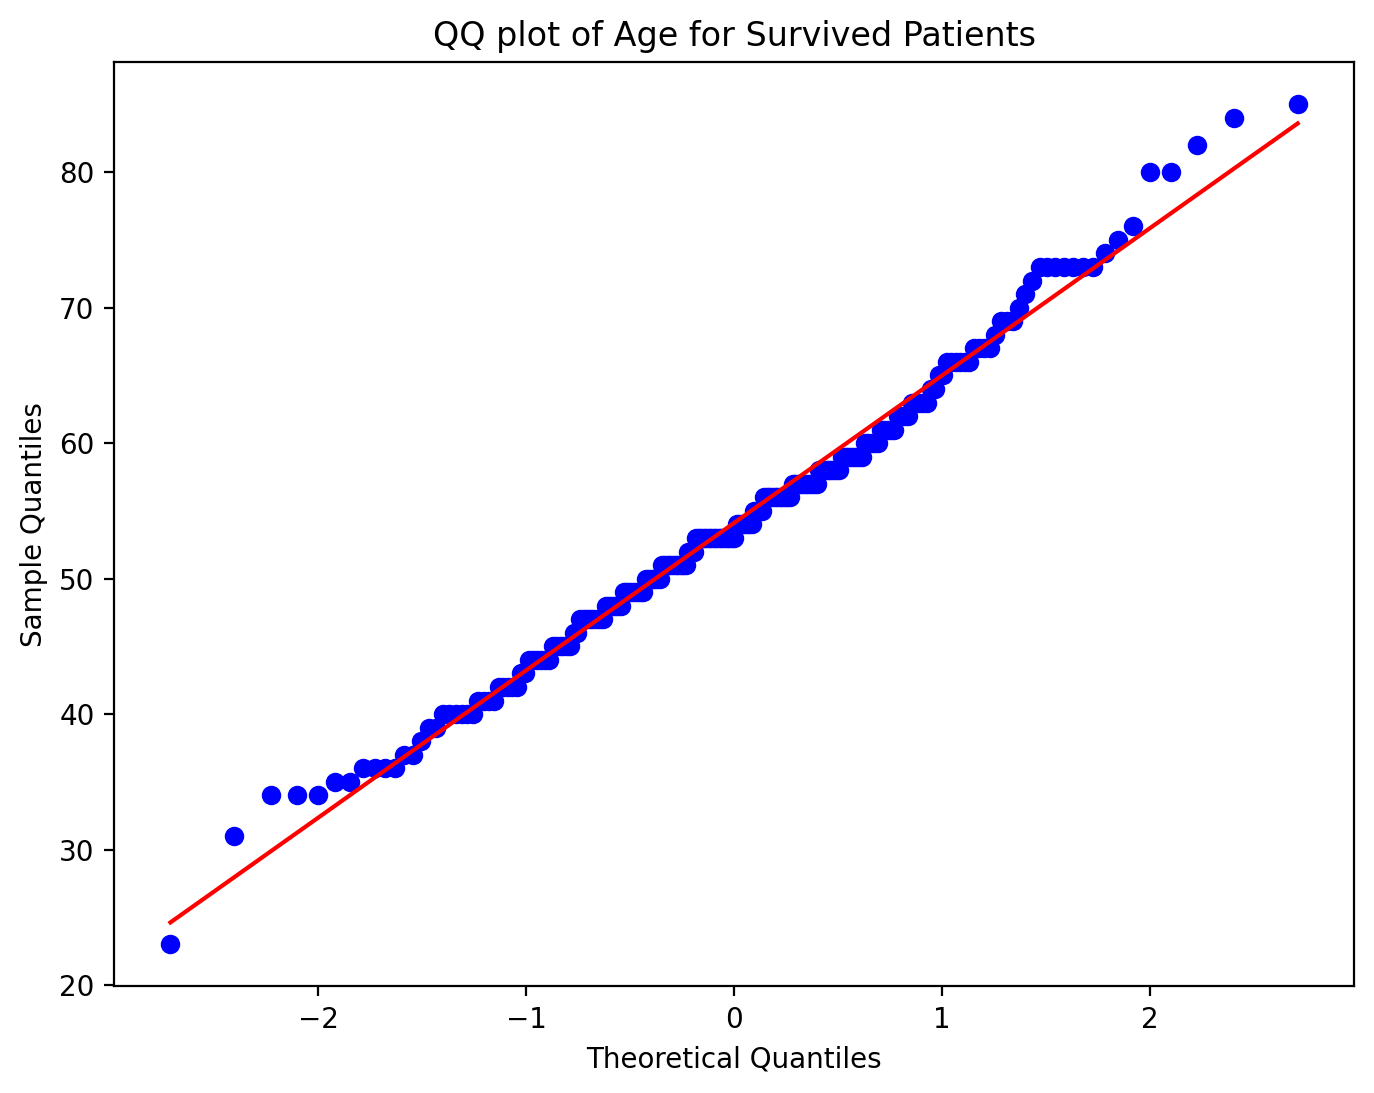

In [17]:
## Create a similar QQ plot for the `age_survived` data
plt.figure(figsize=(8, 6))
stats.probplot(age_survived, dist="norm", plot=plt)
plt.title('QQ plot of Age for Survived Patients')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show();

In [18]:
# Conduct a Shapiro-Wilk test for normality on the `age_died` data
stats.shapiro(age_died)

ShapiroResult(statistic=np.float64(0.9420111357919863), pvalue=np.float64(0.00018938181206075024))

In [19]:
# Conduct a Shapiro-Wilk test for normality on the `age_survived` data
stats.shapiro(age_survived)

ShapiroResult(statistic=np.float64(0.9910479904980413), pvalue=np.float64(0.2308916592704981))

In [21]:
# Conduct a t-test for equal means between the `age_died` and `age_survived` data
# Set the significance level to 0.05
alpha = 0.05
t_stat, p_value = stats.ttest_ind(age_died, age_survived, equal_var=True)
# Print the t-statistic and p-value
print(f't-statistic: {t_stat}, p-value: {p_value}')
# Check if the null hypothesis can be rejected
if p_value < alpha:
    print("Reject the null hypothesis: there is a significant difference in means.")
else:
    print("Fail to reject the null hypothesis: there is no significant difference in means.")

t-statistic: 5.568894557769548, p-value: 5.575021676545234e-08
Reject the null hypothesis: there is a significant difference in means.


In [22]:
# Conduct a Mann-Whitney U test for equal medians between the `age_died` and `age_survived` data
# Set the significance level to 0.05
alpha = 0.05
u_stat, p_value = stats.mannwhitneyu(age_died, age_survived)
# Print the U-statistic and p-value
print(f'U-statistic: {u_stat}, p-value: {p_value}')
# Check if the null hypothesis can be rejected
if p_value < alpha:
    print("Reject the null hypothesis: there is a significant difference in medians.")
else:
    print("Fail to reject the null hypothesis: there is no significant difference in medians.")

U-statistic: 14709.5, p-value: 1.3213922162691065e-07
Reject the null hypothesis: there is a significant difference in medians.


The mean age of the survivors is 54 years (SD), while the mean age of the non-survivors is 61 years (). There is enough evidence in the data at the 5% level of significance to conclude that the mean age of the survivors is different from the mean age of the non-survivors. Due to the violation of normality, the Mann-Whitney U test was used to compare the two groups. The p-value is less than 0.05, indicating a significant difference in age between the two groups.

### Mortality vs Class

In [24]:
# Create a contingency table of the `Class` and `Mortality` columns
pd.crosstab(df['Class'], df['Mortality'], margins=True)

Mortality,Died,Survived,All
Class,,,
Infectious,49,101,150
Non-infectious,55,106,161
All,104,207,311


In [25]:
# Use the contingency table to calculate the expected frequencies
contingency_table = pd.crosstab(df['Class'], df['Mortality'])
expected_frequencies = stats.contingency.expected_freq(contingency_table)
# Print the expected frequencies
print(expected_frequencies)

[[ 50.1607717  99.8392283]
 [ 53.8392283 107.1607717]]


In [26]:
#B Conduct a Chi-squared test for independence between the `Class` and `Mortality` columns
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
# Print the Chi-squared statistic, p-value, degrees of freedom, and expected frequencies
print(f'Chi-squared statistic: {chi2_stat}, p-value: {p_value}, degrees of freedom: {dof}')
# Check if the null hypothesis can be rejected
if p_value < alpha:
    print("Reject the null hypothesis: there is a significant association between Class and Mortality.")
else:
    print("Fail to reject the null hypothesis: there is no significant association between Class and Mortality.")

Chi-squared statistic: 0.025261737710934283, p-value: 0.8737166065287936, degrees of freedom: 1
Fail to reject the null hypothesis: there is no significant association between Class and Mortality.


### WCC vs HB

In [28]:
# Summary statistics of `WCC` column
df['WCC'].describe()

count    311.000000
mean      10.286817
std        4.023486
min       -0.800000
25%        7.600000
50%       10.000000
75%       12.650000
max       30.800000
Name: WCC, dtype: float64

In [30]:
# Summary statistics of `HB` column
df['HB'].describe()

count    311.000000
mean      13.529260
std        2.459835
min        4.900000
25%       11.950000
50%       13.600000
75%       15.150000
max       20.200000
Name: HB, dtype: float64

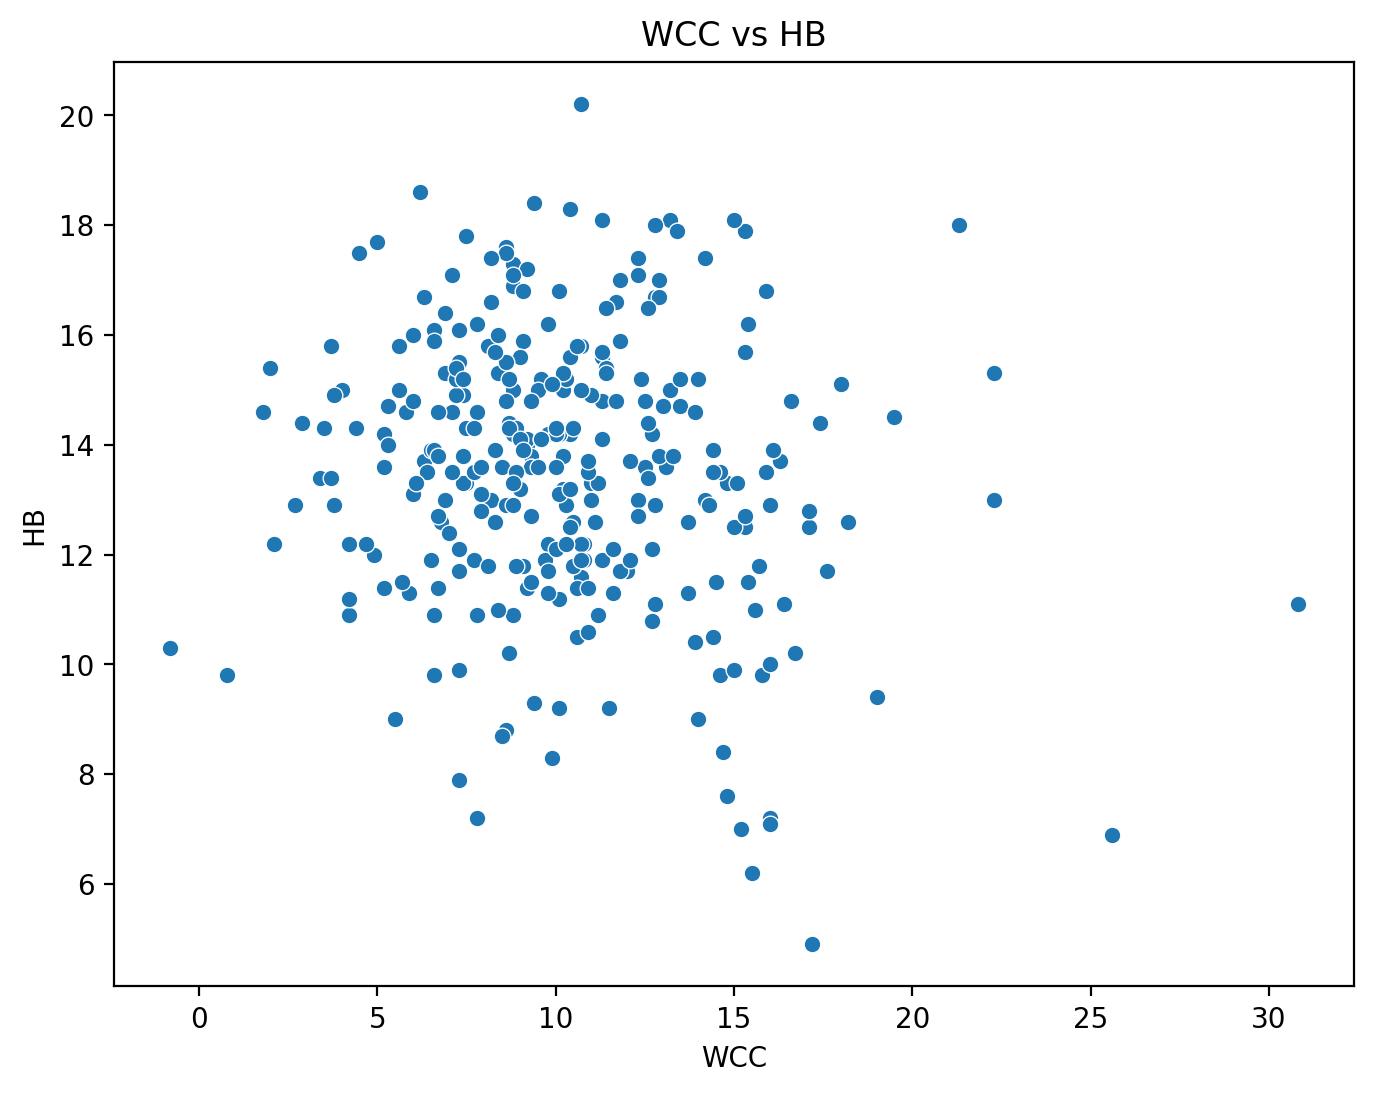

In [31]:
# Create a scatter plot of `WCC` vs `HB`
# Add the title "WCC vs HB"
# Add the horizontal label "WCC"
# Add the vertical label "HB"
plt.figure(figsize=(8, 6))
sns.scatterplot(x='WCC', y='HB', data=df)
plt.title('WCC vs HB')
plt.xlabel('WCC')
plt.ylabel('HB')
plt.show();

In [32]:
# Calculate the correlation coefficient between `WCC` and `HB`
correlation_coefficient = df['WCC'].corr(df['HB'])
# Print the correlation coefficient
print(f'Correlation coefficient between WCC and HB: {correlation_coefficient}')

Correlation coefficient between WCC and HB: -0.1511259167946297


In [33]:
# Conduct a Pearson correlation test between `WCC` and `HB`
pearson_stat, p_value = stats.pearsonr(df['WCC'], df['HB'])
# Print the Pearson correlation statistic and p-value
print(f'Pearson correlation statistic: {pearson_stat}, p-value: {p_value}')
# Check if the null hypothesis can be rejected

if p_value < alpha:
    print("Reject the null hypothesis: there is a significant correlation between WCC and HB.")
else:
    print("Fail to reject the null hypothesis: there is no significant correlation between WCC and HB.")

Pearson correlation statistic: -0.1511259167946297, p-value: 0.007590698508170839
Reject the null hypothesis: there is a significant correlation between WCC and HB.


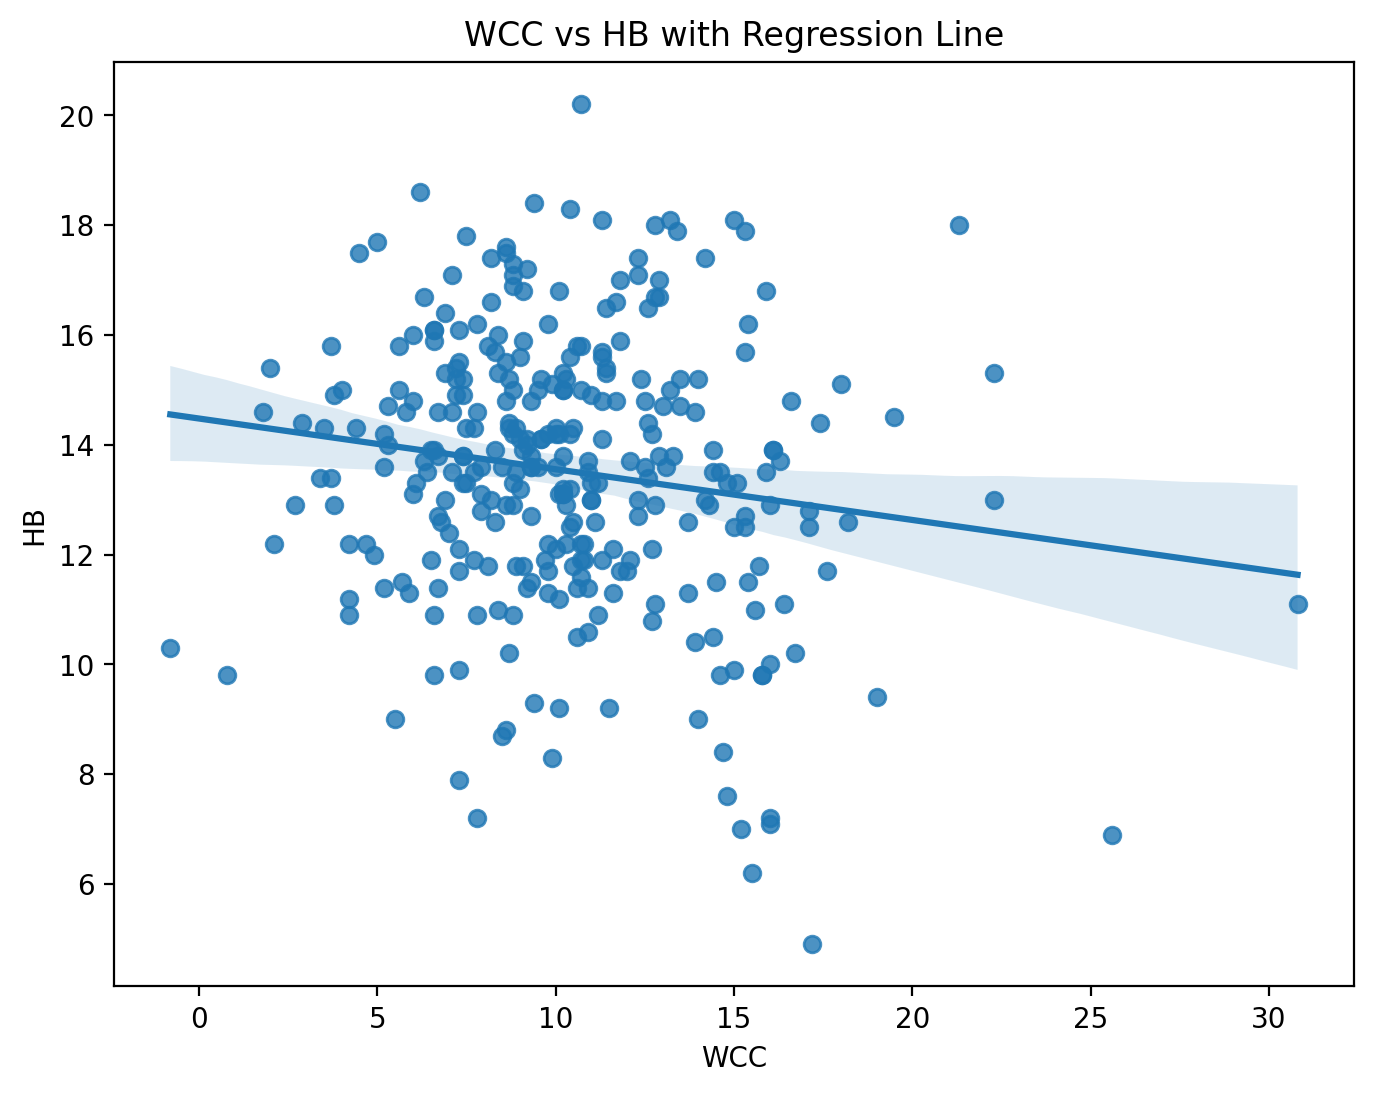

In [34]:
# Recreate the scatter plot of `WCC` vs `HB` with a regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='WCC', y='HB', data=df)
plt.title('WCC vs HB with Regression Line')
plt.xlabel('WCC')
plt.ylabel('HB')
plt.show();